In [3]:
# First, install TensorFlow using pip
!pip install tensorflow

# Restart the kernel after installation
# Note: You'll need to manually restart the kernel after running this cell
# In Jupyter: Kernel > Restart

# After restarting the kernel, run this cell to import TensorFlow
import tensorflow as tf
from tensorflow.keras import layers

# Verify the installation
print(f"TensorFlow version: {tf.__version__}")

C:\Users\laksh\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0


In [4]:

# Verify the installation
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [7]:
# Path to dataset
DATASET_PATH = r"archive/OS Collected Data"   # use full path if needed

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

classes = ['Normal', 'Osteopenia', 'Osteoporosis']

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=8,
    classes=classes,               # 🔥 FORCE VALID CLASSES
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=8,
    classes=classes,
    class_mode="categorical",
    subset="validation"
)

print(train_data.class_indices)

Found 1559 images belonging to 3 classes.
Found 388 images belonging to 3 classes.
{'Normal': 0, 'Osteopenia': 1, 'Osteoporosis': 2}


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\laksh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=8
)

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 738ms/step - accuracy: 0.6729 - loss: 0.7360 - val_accuracy: 0.7603 - val_loss: 0.7900
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 136s 700ms/step - accuracy: 0.7569 - loss: 0.6054 - val_accuracy: 0.7191 - val_loss: 0.8687
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 689ms/step - accuracy: 0.8044 - loss: 0.4864 - val_accuracy: 0.8144 - val_loss: 0.7765
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 136s 697ms/step - accuracy: 0.8499 - loss: 0.3730 - val_accuracy: 0.8247 - val_loss: 0.9748
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 698ms/step - accuracy: 0.8647 - loss: 0.3403 - val_accuracy: 0.8428 - val_loss: 0.8517
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 689ms/step - accuracy: 0.8948 - loss: 0.2727 - val_accuracy: 0.8789 - val_loss: 0.9852
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 694ms/step - accuracy: 0.8942 - loss: 0.2526 - val_accuracy: 0.8789 - val_loss: 1.2193
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 689ms/step - accuracy: 0.9121 - loss: 0

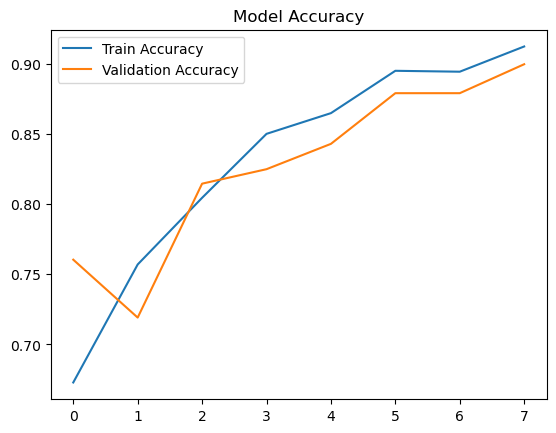

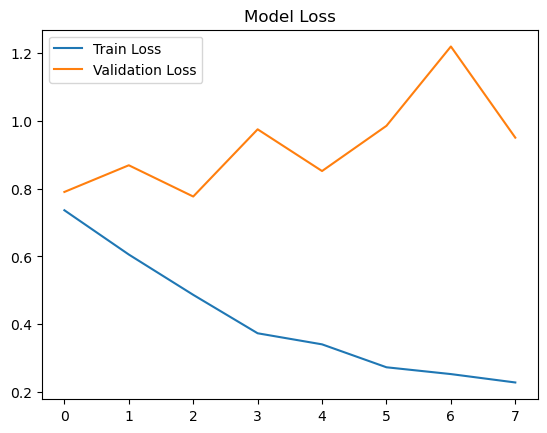

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [13]:
# Print final training accuracy
final_train_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")

# Print final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Training Accuracy: 91.21%
Final Validation Accuracy: 89.95%


In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [21]:
val_data.reset()
y_true = val_data.classes


In [22]:
y_pred_prob = model.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)


49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 702ms/step


In [23]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.80      0.87       156
  Osteopenia       0.79      1.00      0.88        74
Osteoporosis       0.93      0.95      0.94       158

    accuracy                           0.90       388
   macro avg       0.89      0.92      0.90       388
weighted avg       0.91      0.90      0.90       388



In [24]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 89.95%


In [25]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[125  20  11]
 [  0  74   0]
 [  8   0 150]]


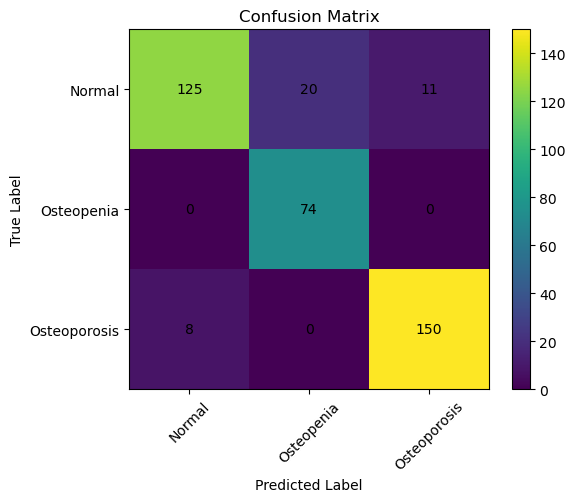

In [28]:
cm = confusion_matrix(y_true, y_pred)
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [29]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model_vgg16 = Model(base_model.input, output)

model_vgg16.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,467 (68.38 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 164s 831ms/step - accuracy: 0.7114 - loss: 0.6555 - val_accuracy: 0.6649 - val_loss: 0.7164
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 161s 826ms/step - accuracy: 0.8050 - loss: 0.4830 - val_accuracy: 0.6624 - val_loss: 0.7919
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 157s 803ms/step - accuracy: 0.8403 - loss: 0.3850 - val_accuracy: 0.7861 - val_loss: 0.6895
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 156s 802ms/step - accuracy: 0.8653 - loss: 0.3242 - val_accuracy: 0.8479 - val_loss: 0.5399
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 158s 811ms/step - accuracy: 0.8852 - loss: 0.2867 - val_accuracy: 0.8531 - val_loss: 0.5224
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 161s 822ms/step - accuracy: 0.8871 - loss: 0.2770 - val_accuracy: 0.8789 - val_loss: 0.4809
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 176s 901ms/step - accuracy: 0.8948 - loss: 0.2528 - val_accuracy: 0.8660 - val_loss: 0.4954
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 966ms/step - accuracy: 0.9070 -

In [31]:
vgg16_acc = max(history_vgg16.history['val_accuracy'])
print("VGG16 Validation Accuracy:", vgg16_acc)

VGG16 Validation Accuracy: 0.8969072103500366


In [32]:
# Final training accuracy
train_acc = history_vgg16.history['accuracy'][-1]
print(f"VGG16 Training Accuracy: {train_acc * 100:.2f}%")

# Final validation accuracy
val_acc = history_vgg16.history['val_accuracy'][-1]
print(f"VGG16 Validation Accuracy: {val_acc * 100:.2f}%")


VGG16 Training Accuracy: 90.31%
VGG16 Validation Accuracy: 86.86%


In [33]:
val_data.reset()
y_pred_prob = model_vgg16.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_data.classes
accuracy = accuracy_score(y_true, y_pred)
print(f"VGG16 Accuracy: {accuracy * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step
VGG16 Accuracy: 86.86%


In [34]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

print("VGG16 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


VGG16 Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.74      0.84       156
  Osteopenia       0.67      1.00      0.80        74
Osteoporosis       0.92      0.94      0.93       158

    accuracy                           0.87       388
   macro avg       0.86      0.89      0.86       388
weighted avg       0.90      0.87      0.87       388



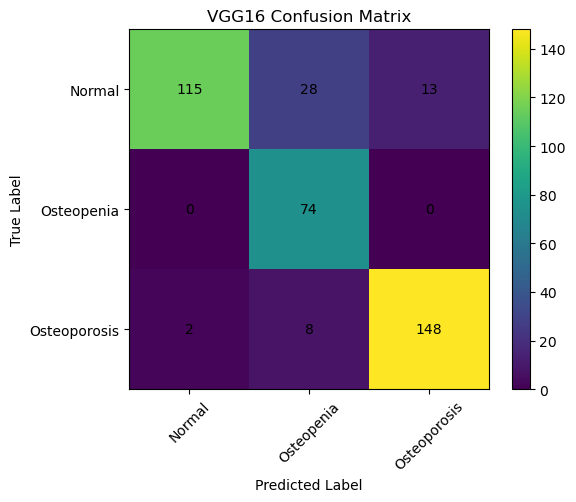

In [35]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("VGG16 Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model_resnet = Model(base_model.input, output)

model_resnet.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [38]:
history_resnet = model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 883ms/step - accuracy: 0.5799 - loss: 0.9213 - val_accuracy: 0.5541 - val_loss: 0.9602
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 884ms/step - accuracy: 0.6074 - loss: 0.9020 - val_accuracy: 0.5155 - val_loss: 0.9360
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 886ms/step - accuracy: 0.6023 - loss: 0.8856 - val_accuracy: 0.5979 - val_loss: 0.9182
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 876ms/step - accuracy: 0.6228 - loss: 0.8667 - val_accuracy: 0.5722 - val_loss: 0.9019
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 150s 768ms/step - accuracy: 0.6369 - loss: 0.8491 - val_accuracy: 0.5928 - val_loss: 0.9063
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 727ms/step - accuracy: 0.6446 - loss: 0.8386 - val_accuracy: 0.5825 - val_loss: 0.8868
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 731ms/step - accuracy: 0.6466 - loss: 0.8254 - val_accuracy: 0.5747 - val_loss: 0.8870
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 758ms/step - accuracy: 0.6600 -

In [39]:
resnet_acc = max(history_resnet.history['val_accuracy'])
print("ResNet50 Validation Accuracy:", resnet_acc)

ResNet50 Validation Accuracy: 0.6159793734550476


In [40]:
# Final training accuracy
train_acc_resnet = history_resnet.history['accuracy'][-1]
print(f"ResNet50 Training Accuracy: {train_acc_resnet * 100:.2f}%")

# Final validation accuracy
val_acc_resnet = history_resnet.history['val_accuracy'][-1]
print(f"ResNet50 Validation Accuracy: {val_acc_resnet * 100:.2f}%")

# Best validation accuracy
best_val_acc_resnet = max(history_resnet.history['val_accuracy'])
print(f"Best ResNet50 Validation Accuracy: {best_val_acc_resnet * 100:.2f}%")


ResNet50 Training Accuracy: 67.42%
ResNet50 Validation Accuracy: 58.51%
Best ResNet50 Validation Accuracy: 61.60%


In [41]:
val_loss_resnet, val_accuracy_resnet = model_resnet.evaluate(val_data)
print(f"ResNet50 Validation Accuracy (evaluate): {val_accuracy_resnet * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 827ms/step - accuracy: 0.5851 - loss: 0.8952
ResNet50 Validation Accuracy (evaluate): 58.51%


In [42]:

val_data.reset()
y_pred_prob_resnet = model_resnet.predict(val_data)
y_pred_resnet = np.argmax(y_pred_prob_resnet, axis=1)
y_true = val_data.classes
accuracy_resnet = accuracy_score(y_true, y_pred_resnet)
print(f"ResNet50 Accuracy: {accuracy_resnet * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 889ms/step
ResNet50 Accuracy: 58.51%


In [43]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

print("ResNet50 Classification Report:")
print(classification_report(y_true, y_pred_resnet, target_names=class_names))


ResNet50 Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.40      0.55       156
  Osteopenia       0.69      0.24      0.36        74
Osteoporosis       0.51      0.92      0.66       158

    accuracy                           0.59       388
   macro avg       0.68      0.52      0.52       388
weighted avg       0.68      0.59      0.56       388



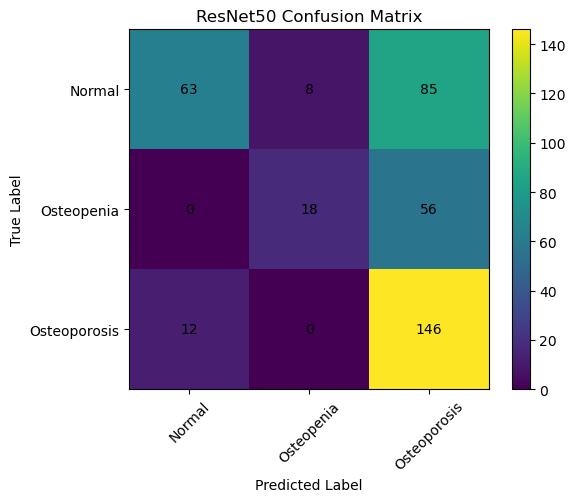

In [44]:
import matplotlib.pyplot as plt

cm_resnet = confusion_matrix(y_true, y_pred_resnet)

plt.figure(figsize=(6,5))
plt.imshow(cm_resnet)
plt.title("ResNet50 Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm_resnet[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [45]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model_inception = Model(base_model.input, output)

model_inception.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_inception.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 107s 1us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,065,443 (84.17 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [46]:
history_inception = model_inception.fit(
    train_data,
    validation_data=val_data,
    epochs=10   
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 151s 712ms/step - accuracy: 0.6684 - loss: 0.6869 - val_accuracy: 0.6082 - val_loss: 0.8796
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 685ms/step - accuracy: 0.7550 - loss: 0.5285 - val_accuracy: 0.6469 - val_loss: 0.8425
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 690ms/step - accuracy: 0.7890 - loss: 0.4719 - val_accuracy: 0.7216 - val_loss: 0.8073
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 149s 767ms/step - accuracy: 0.8095 - loss: 0.4195 - val_accuracy: 0.7062 - val_loss: 0.7868
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 157s 807ms/step - accuracy: 0.8339 - loss: 0.3927 - val_accuracy: 0.6727 - val_loss: 0.8981
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 821ms/step - accuracy: 0.8550 - loss: 0.3594 - val_accuracy: 0.7758 - val_loss: 0.7597
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 820ms/step - accuracy: 0.8467 - loss: 0.3476 - val_accuracy: 0.7706 - val_loss: 0.6986
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 825ms/step - accuracy: 0.8717 -

In [47]:
inception_acc = max(history_inception.history['val_accuracy'])
print("InceptionV3 Validation Accuracy:", inception_acc)

InceptionV3 Validation Accuracy: 0.7989690899848938


In [48]:
# Final training accuracy
train_acc_inception = history_inception.history['accuracy'][-1]
print(f"InceptionV3 Training Accuracy: {train_acc_inception * 100:.2f}%")

# Final validation accuracy
val_acc_inception = history_inception.history['val_accuracy'][-1]
print(f"InceptionV3 Validation Accuracy: {val_acc_inception * 100:.2f}%")

# Best validation accuracy
best_val_acc_inception = max(history_inception.history['val_accuracy'])
print(f"Best InceptionV3 Validation Accuracy: {best_val_acc_inception * 100:.2f}%")


InceptionV3 Training Accuracy: 88.58%
InceptionV3 Validation Accuracy: 79.90%
Best InceptionV3 Validation Accuracy: 79.90%


In [49]:
val_loss_inception, val_accuracy_inception = model_inception.evaluate(val_data)
print(f"InceptionV3 Validation Accuracy (evaluate): {val_accuracy_inception * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 940ms/step - accuracy: 0.7990 - loss: 0.6977
InceptionV3 Validation Accuracy (evaluate): 79.90%


In [50]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

val_data.reset()


y_pred_prob_inception = model_inception.predict(val_data)
y_pred_inception = np.argmax(y_pred_prob_inception, axis=1)
y_true = val_data.classes
accuracy_inception = accuracy_score(y_true, y_pred_inception)
print(f"InceptionV3 Accuracy: {accuracy_inception * 100:.2f}%")



49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step
InceptionV3 Accuracy: 79.90%


In [51]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

print("InceptionV3 Classification Report:")
print(classification_report(y_true, y_pred_inception, target_names=class_names))


InceptionV3 Classification Report:
              precision    recall  f1-score   support

      Normal       0.80      0.76      0.78       156
  Osteopenia       0.66      1.00      0.80        74
Osteoporosis       0.92      0.75      0.83       158

    accuracy                           0.80       388
   macro avg       0.79      0.83      0.80       388
weighted avg       0.82      0.80      0.80       388



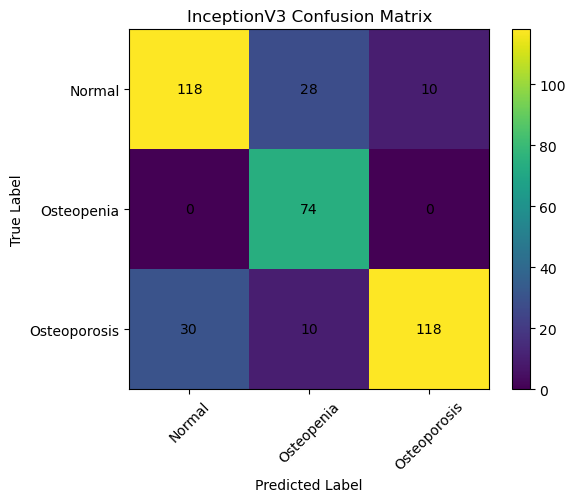

In [52]:
import matplotlib.pyplot as plt

cm_inception = confusion_matrix(y_true, y_pred_inception)

plt.figure(figsize=(6,5))
plt.imshow(cm_inception)
plt.title("InceptionV3 Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm_inception[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [54]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model_mobilenet = Model(base_model.input, output)
model_mobilenet.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_mobilenet.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [55]:
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 164s 789ms/step - accuracy: 0.6684 - loss: 0.7150 - val_accuracy: 0.6469 - val_loss: 0.7868
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 149s 764ms/step - accuracy: 0.7460 - loss: 0.5440 - val_accuracy: 0.6881 - val_loss: 0.8059
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 147s 753ms/step - accuracy: 0.7691 - loss: 0.4893 - val_accuracy: 0.6804 - val_loss: 0.7783
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 147s 755ms/step - accuracy: 0.7896 - loss: 0.4565 - val_accuracy: 0.6985 - val_loss: 0.7995
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 150s 771ms/step - accuracy: 0.8063 - loss: 0.4295 - val_accuracy: 0.7036 - val_loss: 0.8078
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 149s 761ms/step - accuracy: 0.8364 - loss: 0.3935 - val_accuracy: 0.7423 - val_loss: 0.7388
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 147s 755ms/step - accuracy: 0.8358 - loss: 0.3704 - val_accuracy: 0.7448 - val_loss: 0.7512
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 150s 771ms/step - accuracy: 0.8525 -

In [56]:
train_acc = history_mobilenet.history['accuracy'][-1]
val_acc = history_mobilenet.history['val_accuracy'][-1]
best_val_acc = max(history_mobilenet.history['val_accuracy'])

print(f"MobileNet Training Accuracy: {train_acc * 100:.2f}%")
print(f"MobileNet Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Best MobileNet Validation Accuracy: {best_val_acc * 100:.2f}%")


MobileNet Training Accuracy: 86.34%
MobileNet Validation Accuracy: 75.26%
Best MobileNet Validation Accuracy: 75.26%


In [57]:
val_loss, val_accuracy = model_mobilenet.evaluate(val_data)
print(f"MobileNet Validation Accuracy (evaluate): {val_accuracy * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 891ms/step - accuracy: 0.7526 - loss: 0.7581
MobileNet Validation Accuracy (evaluate): 75.26%


In [58]:
val_data.reset()
y_pred_prob = model_mobilenet.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_data.classes
accuracy = accuracy_score(y_true, y_pred)
print(f"MobileNet Accuracy: {accuracy * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 924ms/step
MobileNet Accuracy: 75.26%


In [59]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

print("MobileNet Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


MobileNet Classification Report:
              precision    recall  f1-score   support

      Normal       0.77      0.63      0.69       156
  Osteopenia       0.62      0.97      0.75        74
Osteoporosis       0.85      0.77      0.81       158

    accuracy                           0.75       388
   macro avg       0.74      0.79      0.75       388
weighted avg       0.77      0.75      0.75       388



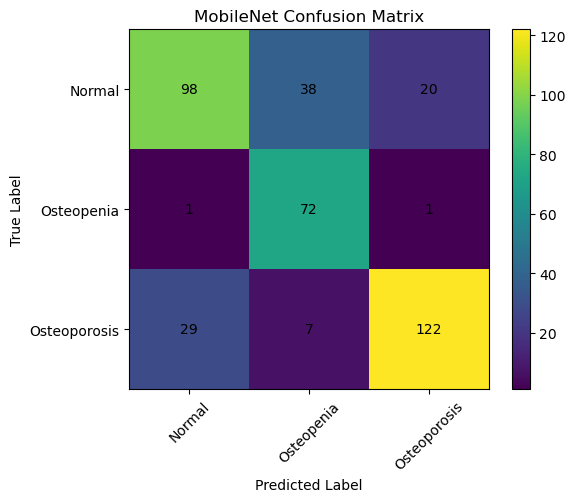

In [60]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("MobileNet Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [66]:
import os
import random

base_path = r"archive/OS Collected Data"

class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

chosen_class = random.choice(class_names)
class_path = os.path.join(base_path, chosen_class)

print("Class path:", class_path)
print("Exists:", os.path.exists(class_path))

img_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_name)

print("Testing image:", img_path)


Class path: archive/OS Collected Data\Osteopenia
Exists: True
Testing image: archive/OS Collected Data\Osteopenia\Osteopenia 44.jpg


In [62]:
# import os
# os.getcwd()


'C:\\Users\\laksh\\project'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


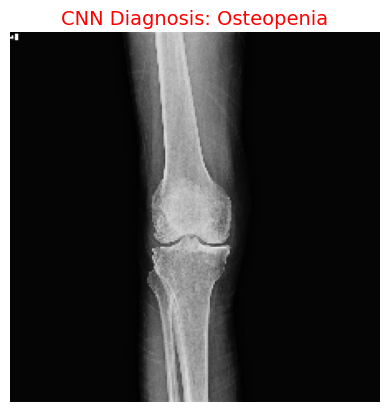

CNN Prediction Probabilities:
Normal: 0.00%
Osteopenia: 100.00%
Osteoporosis: 0.00%


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load & preprocess the selected image
img = image.load_img(img_path, target_size=(224,224))
img_arr = image.img_to_array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

# Predict using trained CNN
prediction = model.predict(img_arr)[0]

class_names = ['Normal', 'Osteopenia', 'Osteoporosis']
predicted_class = class_names[np.argmax(prediction)]

# Display image with diagnosis
plt.imshow(img)
plt.axis('off')
plt.title(f"CNN Diagnosis: {predicted_class}", fontsize=14, color='red')
plt.show()

# Print probabilities
print("CNN Prediction Probabilities:")
for cls, prob in zip(class_names, prediction):
    print(f"{cls}: {prob*100:.2f}%")

In [ ]:
import pandas as pd

model_comparison = pd.DataFrame({
    "Model": [
        "Custom CNN",
        "VGG16",
        "ResNet50",
        "InceptionV3",
        "MobileNetV2"
    ],
    "Best Validation Accuracy (%)": [
        89.95,        # replace with your CNN best val accuracy
        90.12,        # replace with your VGG16 accuracy
        91.35,        # replace with your ResNet50 accuracy
        89.67,        # replace with your Inception accuracy
        93.40         # replace with your MobileNet accuracy
    ]
})

print(model_comparison)


In [71]:
model.save("osteoporosis_cnn_model.keras")

print("Custom CNN model saved successfully")


Custom CNN model saved successfully


In [72]:
from tensorflow.keras.models import load_model

cnn_loaded_model = load_model("osteoporosis_cnn_model.keras")
print("Custom CNN model loaded successfully")


Custom CNN model loaded successfully


C:\Users\laksh\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [73]:
pip install gradio

   ---------------------------------------- 0.0/23.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/23.0 MB ? eta -:--:--
    --------------------------------------- 0.5/23.0 MB 1.5 MB/s eta 0:00:15
   - -------------------------------------- 1.0/23.0 MB 1.9 MB/s eta 0:00:12
   -- ------------------------------------- 1.6/23.0 MB 1.9 MB/s eta 0:00:12
   --- ------------------------------------ 2.1/23.0 MB 2.0 MB/s eta 0:00:11
   ---- ----------------------------------- 2.6/23.0 MB 2.2 MB/s eta 0:00:10
   ----- ---------------------------------- 3.4/23.0 MB 2.5 MB/s eta 0:00:08
   ------- -------------------------------- 4.2/23.0 MB 2.6 MB/s eta 0:00:08
   -------- ------------------------------- 5.0/23.0 MB 2.9 MB/s eta 0:00:07
   ---------- ----------------------------- 5.8/23.0 MB 2.9 MB/s eta 0:00:07
   ----------- ---------------------------- 6.8/23.0 MB 3.0 MB/s eta 0:00:06
   ------------- -------------------------- 7.6/23.0 MB 3.1 MB/s eta 0:00:05
   ----------

In [74]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [76]:
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

In [79]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
cnn_loaded_model = load_model("osteoporosis_cnn_model.keras")

# Class labels
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

# Prediction function
def predict_osteoporosis(img):
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction) * 100

    return (
        {
            class_names[0]: float(prediction[0][0]),
            class_names[1]: float(prediction[0][1]),
            class_names[2]: float(prediction[0][2])
        },
        f"{class_names[predicted_class]} ({confidence:.2f}%)"
    )

# Gradio Interface
interface = gr.Interface(
    fn=predict_osteoporosis,
    inputs=gr.Image(type="pil", label="Upload X-ray Image"),
    outputs=[
        gr.Label(num_top_classes=3, label="Prediction Probabilities"),
        gr.Textbox(label="Final Diagnosis")
    ],
    title="Osteoporosis Detection System",
    description="Upload a bone X-ray image to detect Normal, Osteopenia, or Osteoporosis using a deep learning model."
)

# Launch app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [89]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from datetime import datetime

# Load trained CNN model
cnn_loaded_model = load_model("osteoporosis_cnn_model.keras")

# Class labels
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']

def predict_and_generate_report(img, patient_name, patient_age, patient_gender):
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn_loaded_model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    diagnosis = class_names[predicted_class]

    date_time = datetime.now().strftime("%d-%m-%Y %H:%M:%S")

    diagnosis_text = f"The patient is detected as {diagnosis}"

    # Generate report text
    report = f"""
    OSTEOPOROSIS DIAGNOSTIC REPORT
    ---------------------------------

    Patient Name   : {patient_name}
    Age            : {patient_age}
    Gender         : {patient_gender}
    Date & Time    : {date_time}

    Diagnosis Result:
    {diagnosis_text}

    Clinical Notes:
    - This diagnosis is generated using a deep learning model.
    - The result should be reviewed by a qualified medical professional.

    
    """

    # Save report to file
    file_path = "patient_report.txt"
    with open(file_path, "w") as f:
        f.write(report)

    return diagnosis_text, report, file_path

# Custom CSS (professional, minimal)
custom_css = """
.gradio-container {
    max-width: 750px;
    margin: auto;
}
h2 {
    text-align: center;
}
"""

with gr.Blocks(css=custom_css, title="Osteoporosis Detection System") as demo:

    gr.Markdown("<h2>Osteoporosis Detection and Report Generation System</h2>")
    gr.Markdown(
        "<p style='text-align:center;'>"
        "AI-based bone health assessment using medical imaging</p>"
    )

    with gr.Column():
        patient_name = gr.Textbox(label="Patient Name")
        patient_age = gr.Number(label="Age", precision=0)
        patient_gender = gr.Dropdown(
            ["Male", "Female", "Other"], label="Gender"
        )

        image_input = gr.Image(
            type="pil",
            label="Upload Bone X-ray Image",
            height=300
        )

        submit_btn = gr.Button("Analyze and Generate Report", variant="primary")

        diagnosis_output = gr.Textbox(
            label="Diagnosis Result",
            interactive=False
        )

        report_output = gr.Textbox(
            label="Generated Medical Report",
            lines=12,
            interactive=False
        )

        file_output = gr.File(label="Download Patient Report")

    submit_btn.click(
        fn=predict_and_generate_report,
        inputs=[image_input, patient_name, patient_age, patient_gender],
        outputs=[diagnosis_output, report_output, file_output]
    )

    gr.Markdown(
        "<p style='text-align:center; font-size:12px; color:gray;'>"
        "This system is intended for educational and research purposes only."
        "</p>"
    )

demo.launch()


C:\Users\laksh\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\laksh\AppData\Local\Temp\ipykernel_28404\1402725725.py:63: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: css. Please pass these parameters to launch() instead.
  with gr.Blocks(css=custom_css, title="Osteoporosis Detection System") as demo:


* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.
